In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\FraudDetectionData.csv")

In [3]:
# Change the data type of column 'A' from float64 to float32
df['amount'] = df['amount'].astype('float32')
df['oldbalanceOrg'] = df['oldbalanceOrg'].astype('float32')
df['oldbalanceDest'] = df['oldbalanceDest'].astype('float32')
df['newbalanceOrig'] = df['newbalanceOrig'].astype('float32')
df['newbalanceDest'] = df['newbalanceDest'].astype('float32')

In [4]:
df['step'] = df['step'].astype('int32')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('int32') 
df['isFraud'] = df['isFraud'].astype('int32') 

In [5]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['type'])
# printing label
label
# removing the column 'type' from df
# as it is of no use now.
df.drop("type", axis=1, inplace=True)
# Appending the array to our dataFrame
# with column name 'type'
df["type"] = label
# printing Dataframe
#df

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameDest'])
label
df.drop("nameDest", axis=1, inplace=True)
df["nameDest"] = label
#df

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameOrig'])
label
df.drop("nameOrig", axis=1, inplace=True)
df["nameOrig"] = label
#df

## Split

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
# Separate the target variable
y = df['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=18)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998709
1    0.001291
Name: isFraud, dtype: float64
0    0.998709
1    0.001291
Name: isFraud, dtype: float64
0    0.99871
1    0.00129
Name: isFraud, dtype: float64


## Class imbalance

In [9]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

# Apply ADASYN only on the minority class of the train set
ada = ADASYN()
X_train_resampled, y_train_resampled = ada.fit_resample(X_train, y_train)

## Outliers

In [10]:
import random
random.seed (20)
import numpy as np
from scipy import stats

# Specify columns with outliers
cols_with_outliers = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Specify the number of bootstrapped samples to create per column
num_samples = 50

# Specify the right trimming proportions for each column
trim_props = {'amount': 0.14, 'oldbalanceOrg': 0.24, 'newbalanceOrig': 0.25, 'oldbalanceDest': 0.22, 'newbalanceDest': 0.22}

# Initialize empty dictionaries to store the trimmed means for each column
train_trimmed_means = {}

# Loop over the specified columns
for col_name in cols_with_outliers:
    
    # Check if the trimming proportion for this column is 0
    if trim_props[col_name] == 0:
        # If so, skip this column and move on to the next one
        continue
    
    # Initialize empty lists to store the bootstrapped samples and the trimmed means for the training set
    train_bootstrapped_samples = []
    train_trimmed_means_list = []
    
    # Loop over the number of desired samples
    for i in range(num_samples):
        # Randomly select indices from the column in the training set
        train_sample_indices = np.random.choice(X_train_resampled.index, size=len(X_train_resampled), replace=True)
        
        # Create a bootstrapped sample by indexing into the column with the selected indices for the training set
        train_sample = X_train_resampled.loc[train_sample_indices, col_name]
        
        # Append the bootstrapped samples to the list for the training set
        train_bootstrapped_samples.append(train_sample)
        
        # Calculate the right trimmed mean of the bootstrapped sample for the training set
        train_right_trimmed_mean = np.mean(train_sample[train_sample <= np.percentile(train_sample, 100*(1-trim_props[col_name]))])
        train_trimmed_means_list.append(train_right_trimmed_mean)
        
    # Calculate the mean of the right trimmed means for the training set and add it to the dictionary
    train_trimmed_means[col_name] = np.mean(train_trimmed_means_list)

    # Replace the outliers in the training set with the trimmed means
    X_train_resampled.loc[X_train_resampled[col_name] > np.percentile(X_train_resampled[col_name], 100*(1-trim_props[col_name])), col_name] = train_trimmed_means[col_name]

# Print the trimmed means for each column separately for the training set
print("Train set trimmed means: ", train_trimmed_means)

Train set trimmed means:  {'amount': 109718.25, 'oldbalanceOrg': 57400.9, 'newbalanceOrig': 0.0, 'oldbalanceDest': 126427.51, 'newbalanceDest': 229789.81}


In [11]:
# Assuming your original training data is stored in a pandas DataFrame called X_train
# And assuming you have a list of selected feature names called selected_features
selected_features = ['oldbalanceOrg', 'type', 'nameDest','amount','step']
X_train_selected = X_train_resampled[selected_features]

In [12]:
X_train_selected

,oldbalanceOrg,type,nameDest,amount,step
0,3296.000000,1,11427,305161.156250,373
1,0.000000,3,1743120,8840.879883,406
2,10548.000000,3,736364,3120.010010,205
3,0.000000,1,555402,345647.000000,301
4,0.000000,1,21238,109718.250000,353
...,...,...,...,...,...
11438404,73121.132812,4,513986,73121.132812,256
11438405,116440.031250,4,523991,116440.031250,264
11438406,131832.390625,4,527556,131832.390625,181
11438407,96564.421875,4,534291,96564.421875,388


In [16]:
X_test_selected=X_test[selected_features]

In [17]:
X_test_selected

,oldbalanceOrg,type,nameDest,amount,step
1402687,2.080000e+03,0,75898,176116.968750,139
2760752,5.854688e+06,0,119926,559868.187500,213
3594236,2.745168e+05,3,1249878,8622.099609,262
1933631,7.080094e+04,3,2423326,30724.619141,177
2227203,0.000000e+00,4,426875,815273.687500,186
...,...,...,...,...,...
3753638,0.000000e+00,3,2617210,1305.969971,279
1532557,1.235073e+06,3,1970706,26853.359375,154
2800777,1.291580e+04,3,2318385,28641.919922,217
2444235,2.710670e+05,3,1893170,10589.280273,203


Fold: 1
Confusion matrix:
 [[1512677  393645]
 [   4624 1901857]]
Recall: 0.9975745889940681
Accuracy: 0.8955443016594353
Precision: 0.8285146342717192
F1-score: 0.905218797886617
OOB error: 0.10532067877621787
---------------------
Fold: 2
Confusion matrix:
 [[1512249  394073]
 [   6356 1900125]]
Recall: 0.9966661089200469
Accuracy: 0.8949777893061877
Precision: 0.8282306060767205
F1-score: 0.9046751727518337
OOB error: 0.10514482389989732
---------------------
Fold: 3
Confusion matrix:
 [[1514773  391549]
 [   7900 1898581]]
Recall: 0.995856239847132
Accuracy: 0.89523481805905
Precision: 0.829027609786344
F1-score: 0.9048162910500879
OOB error: 0.10613097503332847
---------------------


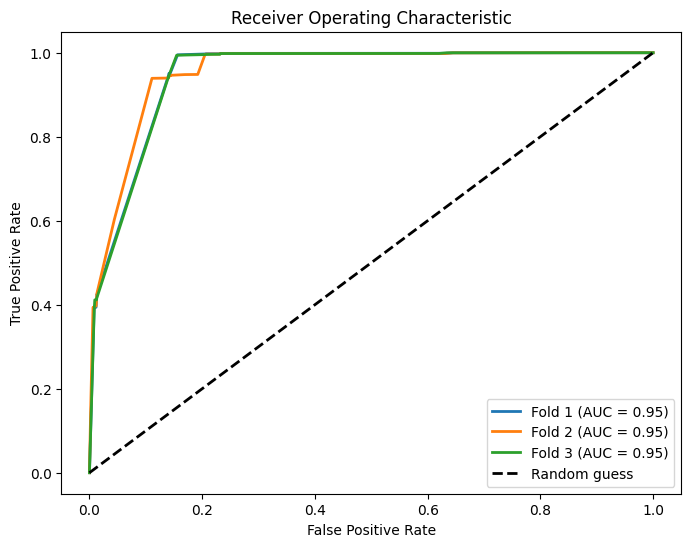

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
import numpy as np

# Define the number of splits for stratified cross-validation
n_splits = 3

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

# Create lists to store evaluation metrics for each fold
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []

# Create lists to store ROC curve data for each fold
fprs = []
tprs = []
aucs = []

# Initialize the OOB error list
oob_error = []

# Iterate over each fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_selected, y_train_resampled)):
    print(f'Fold: {fold+1}')
    
    # Split the data into training and validation sets
    X_fold_train, y_fold_train = X_train_selected.iloc[train_idx], y_train_resampled.iloc[train_idx]
    X_val, y_val = X_train_selected.iloc[val_idx], y_train_resampled.iloc[val_idx]
    
    # Create a RandomForestClassifier object with the given hyperparameters
    rf_model = RandomForestClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=4, max_features='sqrt', min_samples_split=4, n_estimators=181, oob_score=True)
   
    # Fit the model on the training data
    rf_model.fit(X_fold_train, y_fold_train)

    # Predict the class labels for the validation set
    y_val_pred = rf_model.predict(X_val)

    # Compute the evaluation metrics for the current fold
    conf_mat = confusion_matrix(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    # Append the evaluation metrics for the current fold to the lists
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)
    accuracy_scores.append(accuracy)
    
    # Compute the ROC curve and AUC for the current fold
    fpr, tpr, _ = roc_curve(y_val, rf_model.predict_proba(X_val)[:,1])
    roc_auc = auc(fpr, tpr)
    
    # Append the ROC curve data for the current fold to the lists
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(roc_auc)
    
    # Compute the OOB error for the current fold and append to the list
    oob_error.append(1 - rf_model.oob_score_)

    # Print the evaluation metrics for the current fold
    print('Confusion matrix:\n', conf_mat)
    print('Recall:', recall)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('F1-score:', f1)
    print('OOB error:', 1 - rf_model.oob_score_)
    print('---------------------')

# Create the ROC curve plot
fig, ax = plt.subplots(figsize=(8,6))

# Plot the ROC curve for each fold
for i in range(n_splits):
    ax.plot(fprs[i], tprs[i], lw=2, label='Fold %d (AUC = %0.2f)' % (i+1, aucs[i]))

# Add a dashed line representing the random guess classifier
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Random guess')

# Add labels and legend to the plot
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend()

In [18]:
# Predict the class labels for the test set
y_test_pred = rf_model.predict(X_test_selected)

# Compute the evaluation metrics for the test set
conf_mat_test = confusion_matrix(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print the evaluation metrics for the test set
print('Evaluation metrics on test set:')
print('Confusion matrix:\n', conf_mat_test)
print('Recall:', recall_test)
print('Accuracy:', accuracy_test)
print('Precision:', precision_test)
print('F1-score:', f1_test)

Evaluation metrics on test set:
Confusion matrix:
 [[505008 130433]
 [    14    807]]
Recall: 0.9829476248477467
Accuracy: 0.7949791123782342
Precision: 0.00614903992685157
F1-score: 0.01222162485518056


In [20]:
# count the number of occurrences of each unique value in y_test
counts = y_test.value_counts()

# print the counts
print(counts)

0    635441
1       821
Name: isFraud, dtype: int64


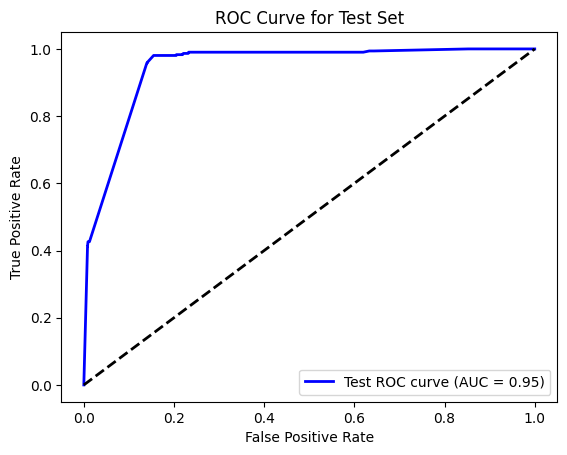

In [21]:
# Predict the class labels and probabilities for the test set
y_test_pred = rf_model.predict(X_test_selected)
y_test_prob = rf_model.predict_proba(X_test_selected)[:, 1]

# Compute the false positive rate, true positive rate, and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")
plt.show()